# ECES681-FINAL PROJECT
# Title :- Image Classification of Birds and Squirrels

*   ## Members -    
                *   Surya Samarth J (ID - 14597124)
                *   Jayanth Suryaprakash (ID - 14599788)
                *   Riya Gaur (ID - 14597502)


## 1. Introduction

### Problem Statement
In this project, we tackle the challenge of classifying images into two distinct categories: birds and squirrels. This classification task is not just an academic exercise but holds profound implications for ecological studies and conservation efforts. Accurate and efficient wildlife monitoring is indispensable for understanding biodiversity. This project, if developed further could aid in tracking species health, and making informed decisions in conservation strategies. By distinguishing between birds and squirrels in camera trap images. We can gain valuable insights into the vast majority of the population and other aspects such as the population dynamics, behavior, and habitat use.

### Objective
The primary objective of this project is to develop a reliable deep learning model that can accurately classify images as either birds or squirrels. Achieving high accuracy in this classification task will demonstrate the potential of artificial intelligence (AI) in enhancing wildlife monitoring techniques, paving the way for broader applications in ecological research and conservation planning.


In [ ]:
import time
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision.utils import make_grid
import torchvision
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Motivation and Usefulness
*   The advent of automated image classification represents a significant leap forward from traditional manual identification methods. In the context of wildlife conservation, where speed and accuracy can be critical, the ability to automatically classify animals and their species from images is invaluable. This project is driven by the goal of leveraging deep learning to make species identification more efficient and reliable, thereby supporting ongoing conservation efforts and ecological studies. Automated classification can drastically reduce the manpower and time required for data analysis, allowing conservationists to monitor wildlife populations more effectively and react swiftly to emerging threats.

*   The motivation also mainly stems from a podcast and our love for wildlife which ultimately was the driving factor for us to dive deep into making the process of species identification easier for the wildlife conservationists who work very hard to maintain ecological balance among wildlife species.



Article related to podcast - https://www.discovery.com/dnews/inside-the-adventures-of-forrest-galante

Video related to the article - https://www.youtube.com/watch?v=zTIsxKzpH_k

Podcast - https://www.youtube.com/watch?v=tCRjz1fyOE4


###**What it says?**
The podcast led us to this article which talks about the world renowned "Forrest Galante" who successfully rediscovered the **Fernandina Tortoise**, believed to be extinct since 1906, in one of his many expeditions for Extinct or Alive.

### Prior Work Summary
The field of image classification has seen remarkable advancements thanks to deep learning. Specifically, convolutional neural networks (CNNs) have become the go-to model for tasks involving image data due to their ability to learn complex patterns and features directly from the images. This project builds on the foundation laid by previous research in wildlife image classification, which has demonstrated the effectiveness of CNNs in identifying various species with high accuracy. Our literature review has uncovered several key methodologies that have shaped our approach, including innovations in network architecture, data augmentation techniques, and strategies for dealing with imbalanced datasets.


In [1]:

BIRD_SQUIRREL_CLASSES = ('bird', 'squirrel')

def load_dataset(root_path, batch_size):
    # Define transformations for the training, validation, and testing sets
    transform_train = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    transform_test = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Loading datasets
    train_dataset = datasets.ImageFolder(root=os.path.join(root_path, 'train'), transform=transform_train)
    test_dataset = datasets.ImageFolder(root=os.path.join(root_path, 'test'), transform=transform_test)
    val_dataset = datasets.ImageFolder(root=os.path.join(root_path, 'val'), transform=transform_test)

    # Creating data loaders
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader, val_loader

## 2. Dataset

### Description
Our dataset consists of a curated collection of bird and squirrel images. For the sake of simplicity, we wanted to stick to principle elements, and hence for this purpose we chose to work only with images related to 'Birds' and 'Squirrels'
These images were downloaded from multiple sources such as :-


*   Direct downloads from google,
*   Pixabay - https://pixabay.com/images/search/birds/
*   Acquired some images from imagenet and further augumented it.


We meticulously compiled 500 different images of 'Birds' and 500 different images of 'Squirrels' to train and evaluate our deep learning model. Each image undergoes a series of preprocessing steps to ensure it meets the input requirements of our neural network. This includes resizing images to a uniform resolution, applying normalization to standardize the pixel values, and augmenting the dataset to introduce variability. This preprocessing not only improves the model's ability to learn from the data but also helps in mitigating overfitting.

### Dataset Split
To ensure a comprehensive evaluation of our model, we've divided our dataset into training, testing, and validation sets following the conventional split ratios of 70%, 20%, and 10%, respectively as per the given requirements for the project. This distribution allows our model to learn from a vast majority of the data (training set), fine-tune its parameters against a smaller set (validation set), and finally, be evaluated on unseen data (testing set). The rationale behind this split is to balance the model's exposure to the data with its ability to generalize to new, unseen images.

### Dataset Challenges and Solutions
One of the primary challenges we encountered was setting up the dataset with 500 different images each. The availability of unique images was an issue which initially led to duplicative images being present in our dataset.

Due to this duplication in our dataset, there was an imbalance between the number of bird and squirrel images. Such imbalances can bias the model towards the more represented class, thereby affecting its overall performance. To address this, we employed data augmentation techniques to artificially increase the size of the underrepresented class and ensure a more balanced dataset. Additionally, we utilized weighted sampling during the training process to give higher importance to underrepresented classes, further mitigating the impact of dataset imbalance.


In [ ]:
# Example usage
root_path = '/content/drive/MyDrive/Mini-project/681_New_Data/'  # Update this path to the location of your dataset
batch_size = 32
train_loader, test_loader, val_loader = load_dataset(root_path, batch_size)

# Print the number of samples in each dataset
print("Number of training samples:", len(train_loader.dataset))
print("Number of testing samples:", len(test_loader.dataset))
print("Number of validation samples:", len(val_loader.dataset))

Number of training samples: 700
Number of testing samples: 200
Number of validation samples: 100


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Method

## Method

Our methodology encompasses a carefully designed approach to tackle the binary classification challenge of distinguishing between bird and squirrel images. This section outlines the model architecture, custom modifications, loss function and optimizer selection, implementation highlights, and initial sanity checks performed.

### Model Architecture

The cornerstone of our approach is a convolutional neural network (CNN) inspired by the GoogleNet architecture. Known for its efficiency and effectiveness in image recognition tasks, GoogleNet employs inception modules that allow the network to capture and analyze information at various scales simultaneously. This capability is particularly beneficial for our task, enabling the model to identify features relevant to birds and squirrels across a range of image conditions.

### Custom Modifications to the Architecture

To tailor the GoogleNet architecture to our specific needs, we have introduced several key modifications:

- **Output Layer Adaptation:** The original architecture, designed for multi-class classification, has been adapted to our binary classification task. We revised the final layer to consist of two output neurons, corresponding directly to our classes: birds and squirrels.

- **Input Preprocessing:** Considering the diverse sizes and orientations of subjects in our dataset, we implemented preprocessing steps such as resizing and normalization to ensure consistency across input images.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Convolutional_2d(nn.Module):
    def __init__(self, in_channels, out_channels, **kwargs):
        super(Convolutional_2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, **kwargs)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        return self.relu(self.conv(x))

class Inception(nn.Module):
    def __init__(self, in_channels, ch1x1, ch3x3red, ch3x3, ch5x5red, ch5x5, pool_proj):
        super(Inception, self).__init__()
        self.branch1 = Convolutional_2d(in_channels, ch1x1, kernel_size=1)

        self.branch2 = nn.Sequential(
            Convolutional_2d(in_channels, ch3x3red, kernel_size=1),
            Convolutional_2d(ch3x3red, ch3x3, kernel_size=3, padding=1),
        )

        self.branch3 = nn.Sequential(
            Convolutional_2d(in_channels, ch5x5red, kernel_size=1),
            Convolutional_2d(ch5x5red, ch5x5, kernel_size=5, padding=2),
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            Convolutional_2d(in_channels, pool_proj, kernel_size=1),
        )

    def forward(self, x):
        outputs = [branch(x) for branch in [self.branch1, self.branch2, self.branch3, self.branch4]]
        return torch.cat(outputs, 1)

class GoogleNet(nn.Module):
    def __init__(self):
        super(GoogleNet, self).__init__()
        self.conv1 = Convolutional_2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True)
        self.conv2 = Convolutional_2d(64, 64, kernel_size=1)
        self.conv3 = Convolutional_2d(64, 192, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True)

        # Simplified inception modules sequence
        self.inception3a = Inception(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True)

        # Adjust the number of channels according to the actual sequence
        # Ensuring the output from the last inception module matches
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.4)

        # Adjusting for a binary classification output
        self.fc = nn.Linear(480, 2)  # Adjust the input features to match the output of the last inception module

    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.maxpool2(x)
        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool3(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

### Loss Function and Optimizer

For the task at hand, we selected the CrossEntropyLoss function, a standard choice for binary classification problems. This loss function effectively handles the probabilistic output for two classes, providing a measure of the model's prediction accuracy.

Optimization is carried out using the Stochastic Gradient Descent (SGD) optimizer. We chose SGD for its simplicity and proven track record in efficiently navigating the complex landscape of neural network parameters. Additionally, hyperparameters such as the learning rate and momentum were meticulously tuned to enhance the convergence rate and overall model performance.

### Implementation Highlights

Our implementation strategy is characterized by the following highlights:

- **Data Augmentation:** To bolster the model's ability to generalize, we employed data augmentation techniques such as random horizontal flipping and cropping. These techniques enrich the training dataset without the need for additional data collection.

- **Modular Codebase:** The model definition, training, and evaluation processes are encapsulated in modular code blocks. This structure not only facilitates readability and maintenance but also enhances the reproducibility of our experiments.

### Sanity Checks

Before proceeding with full-scale training, we performed a series of sanity checks:

- **Dataset Integrity:** We verified the integrity and correctness of the dataset loading process, ensuring that images are correctly matched with their labels.

- **Model Initialization:** Initial tests were conducted to confirm that the model architecture was correctly initialized, with all layers properly configured and ready for training.

- **Overfitting on a Small Dataset:** As a preliminary test of the model's capacity, we trained it on a small subset of the data, expecting to achieve near-perfect accuracy. This step helped confirm the model's ability to learn from the data provided.

These methodological steps form the foundation of our approach, setting the stage for the training experiments and subsequent analysis of the model's performance in classifying images of birds and squirrels.

In [ ]:
# Initialize the GoogleNet architecture
Network_arch = GoogleNet()

# Apply custom weights initialization (if necessary)
def Initialise_weights(m):
    if isinstance(m, nn.Conv2d):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)
    elif isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.constant_(m.bias, 0)

Network_arch.apply(Initialise_weights)

GoogleNet(
  (conv1): Convolutional_2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (relu): ReLU(inplace=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): Convolutional_2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (relu): ReLU(inplace=True)
  )
  (conv3): Convolutional_2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU(inplace=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): Convolutional_2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
      (relu): ReLU(inplace=True)
    )
    (branch2): Sequential(
      (0): Convolutional_2d(
        (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU(inplace=True)
      )
      (1): Convolutional_2d(
        (conv): Conv2d(96, 128, kernel_size

In [ ]:
# Enumerate over the test data loader
testdata_ex = enumerate(test_loader)
# Get the first batch from the enumerated test data
batch_idx, (val_ex_data, val_ex_targets) = next(testdata_ex)
# Print the shape of the data in the first batch
print(val_ex_data.shape)


torch.Size([32, 3, 224, 224])


In [ ]:
#Initialization of Hyperparameters
#Number of epochs
EPOCHS = 40
#Batch size and the learning rate
batch_size=32
Learning_rate= 0.1
#Loss Function
Loss_criterion_function = torch.nn.CrossEntropyLoss()
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.empty_cache()

In [ ]:
#For storing the generated train and test accuracy and plotting
def show_train_hist(hist, show=False, save=False, path='Train_hist.png'):
    x = range(len(hist['train_accuracy']))
    y1 = hist['train_accuracy']
    y2 = hist['test_accuracy']
    #plotting
    plt.plot(x, y1, label='train_accuracy')
    plt.plot(x, y2, label='test_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()
    #saving the generated outputs
    if save:
        plt.savefig(path)
    if show:
        plt.show()
    else:
        plt.close()

In [ ]:
#Test Accuracy and loss Evaluation
def Evaluate_Accuracy(dataset_eval_iteration, Network_arch, Loss_criterion_function, device=device):
  #Evaluate accuracy of a model on the testset
  #In evaluation mode, we will be using the dropout and normalization layers
  testset_initial=len(dataset_eval_iteration.dataset)
  test_loss=0
  test_accuracy=0
  Network_arch.eval()
  with torch.no_grad():
    for X, y in dataset_eval_iteration:
        #transfer the produced data to the device
        X = X.to(device)
        y = y.to(device)
        outputs = Network_arch(X)
        #calculating the test accuracy and loss and appending it
        test_loss += Loss_criterion_function(outputs,y).item()
        test_accuracy += (outputs.argmax(1) == y).type(torch.float).sum().item()
  test_accuracy = test_accuracy/testset_initial
  test_loss /= testset_initial
  return test_accuracy, test_loss

In [ ]:
#Cross validating the predicted values for plotting the confusion matrix and predict the correct and incorrect samples
def Cross_validate_predicted_data(Network_arch, dataset_eval_iteration):
    Data_pics_label = []
    Data_pics_val = []
    Network_arch.eval()
    for X, y in dataset_eval_iteration:
      X = X.to(device)
      y = y.to(device)
      prediction = Network_arch(X)
      with torch.no_grad():
            Final_predict = F.softmax(prediction, dim = -1)
            Data_pics_label.append(y.cpu())
            Data_pics_val.append(Final_predict.cpu())
    out1 = torch.cat(Data_pics_label)
    out2 = torch.cat(Data_pics_val)
    return out1, out2

## 4. Experiments

The experimental phase of our project is meticulously designed to assess the effectiveness of our CNN model in classifying images into birds and squirrels. This section delves into the intricacies of our training process, hyperparameter tuning strategies, evaluation metrics, and the criteria for model selection.





In [ ]:
import torch.optim as optim
import time
from datetime import datetime
import os
import pickle

# Adjusting the training function for the bird and squirrel dataset
def training(network_arch, train_loader, test_loader, val_loader, loss_criterion, epochs, batch_size, device, learning_rate=None):
    optimizer = optim.SGD(network_arch.parameters(), lr=learning_rate, weight_decay=1e-5)
    print("Model Training and Testing Start")
    print('GoogleNet Architecture Training and Testing Begins!')
    network_arch.to(device)
    optimizer = optim.SGD(network_arch.parameters(), lr=learning_rate)

    train_hist = {
        'train_accuracy': [],
        'test_accuracy': [],
        'train_loss': [],
        'test_loss': []
    }

    for epoch in range(epochs):
        network_arch.train()
        train_loss = 0
        train_correct = 0
        total = 0



        # Training
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = network_arch(inputs)
            loss = loss_criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            train_correct += predicted.eq(targets).sum().item()

        train_acc = 100. * train_correct / total
        train_hist['train_accuracy'].append(train_acc)
        train_hist['train_loss'].append(train_loss / total)

        # Evaluation
        test_accuracy, test_loss = Evaluate_Accuracy(test_loader, network_arch, loss_criterion, device)
        train_hist['test_accuracy'].append(test_accuracy)
        train_hist['test_loss'].append(test_loss)

        print('Epoch: %d, Train Loss: %.3f, Train Acc: %.3f, Test Loss: %.3f, Test Acc: %.3f' % (epoch+1, train_loss/total, train_acc, test_loss, test_accuracy))
  # Plotting training history
    show_train_hist(train_hist, save=True, path='train_hist.png')


### Training Process and Hyperparameter Tuning

Our training regimen is structured to maximize the model's learning from the dataset, ensuring a comprehensive understanding of the distinguishing features between birds and squirrels. Central to our approach is the strategic tuning of hyperparameters, a critical factor in optimizing model performance:

- **Batch Size and Learning Rate:** We experimented with various batch sizes and learning rates to find the optimal combination that promotes steady and robust learning. A smaller batch size was initially used to increase the model's exposure to different data patterns, coupled with a learning rate meticulously adjusted to balance the speed of convergence with the risk of overshooting the global minimum.

- **Data Augmentation:** To enhance the model's generalizability and robustness against overfitting, we implemented data augmentation techniques such as random resizing, cropping, and horizontal flipping. These techniques not only simulate real-world variability in the dataset but also effectively expand our training dataset without the need for additional images.

- **Epochs:** The model was trained over multiple epochs, allowing for repeated exposure to the entire dataset. This iterative process is crucial for refining the model's weights and biases, gradually improving its classification accuracy.

### Evaluation Metrics and Model Selection

A comprehensive suite of evaluation metrics was employed to gauge the model's performance, ensuring a holistic view of its classification abilities:

- **Accuracy:** Serves as the primary metric, indicating the overall effectiveness of the model in correctly classifying images as either birds or squirrels.

- **Precision, Recall, and F1 Score:** These metrics provide deeper insights into the model's classification capabilities, revealing any tendencies toward false positives or false negatives. Such insights are invaluable for fine-tuning the model to achieve a balanced performance across both classes.

- **Confusion Matrix:** Offers a visual representation of the model's predictions compared to the true labels, highlighting the specific areas where the model excels or struggles.

- **Model Selection:** The final model selection was based on a combination of these metrics, prioritizing a balance between high accuracy and robust performance across different evaluation criteria. This process involved iterative testing and comparison of different model architectures and parameter configurations.

Given the developmental nature of our project, as evidenced in this `.ipynb` file, certain aspects of the model's training and evaluation are still undergoing optimization. For instance, hyperparameter tuning is an iterative process, with ongoing experiments aimed at identifying the most effective settings. Similarly, while preliminary results are promising, they also underscore the need for further adjustments and refinements to achieve the desired levels of accuracy and reliability in real-world applications.


In [ ]:
torch.cuda.empty_cache()

# Example usage
GoogleNet_History = training(
    Network_arch, train_loader, test_loader, val_loader,
    Loss_criterion_function, EPOCHS, batch_size, device, Learning_rate
)

print('GoogleNet Architecture Training and Testing Completed!')

Model Training and Testing Start
GoogleNet Architecture Training and Testing Begins!
Epoch: 1, Train Loss: 0.022, Train Acc: 52.571, Test Loss: 0.024, Test Acc: 0.510
Epoch: 2, Train Loss: 0.022, Train Acc: 53.000, Test Loss: 0.024, Test Acc: 0.520
Epoch: 3, Train Loss: 0.021, Train Acc: 56.571, Test Loss: 0.023, Test Acc: 0.600
Epoch: 4, Train Loss: 0.021, Train Acc: 57.571, Test Loss: 0.023, Test Acc: 0.645
Epoch: 5, Train Loss: 0.021, Train Acc: 60.714, Test Loss: 0.024, Test Acc: 0.500
Epoch: 6, Train Loss: 0.021, Train Acc: 59.857, Test Loss: 0.023, Test Acc: 0.590
Epoch: 7, Train Loss: 0.021, Train Acc: 60.429, Test Loss: 0.022, Test Acc: 0.595
Epoch: 8, Train Loss: 0.020, Train Acc: 62.286, Test Loss: 0.022, Test Acc: 0.655
Epoch: 9, Train Loss: 0.020, Train Acc: 63.714, Test Loss: 0.022, Test Acc: 0.625
Epoch: 10, Train Loss: 0.021, Train Acc: 62.286, Test Loss: 0.022, Test Acc: 0.615
Epoch: 11, Train Loss: 0.020, Train Acc: 61.857, Test Loss: 0.022, Test Acc: 0.635
Epoch: 12, 

In [ ]:
#getting the output of the tensor(weights)
with torch.no_grad():
  Network_arch.to('cpu')
  final_tensor_output = Network_arch(val_ex_data)
#printing the output
print(final_tensor_output)

tensor([[ 0.4944, -0.4981],
        [ 0.4095, -0.3805],
        [ 3.4341, -3.4745],
        [ 0.3798, -0.3899],
        [ 1.5180, -1.6370],
        [ 0.6767, -0.6657],
        [ 2.1966, -2.1595],
        [-0.2202,  0.3939],
        [ 0.5265, -0.4949],
        [ 0.8961, -0.9448],
        [-0.1278,  0.2798],
        [-0.1723,  0.2853],
        [ 0.4579, -0.3877],
        [-0.0458,  0.0663],
        [-0.5001,  0.5675],
        [ 1.0722, -1.1293],
        [ 3.1483, -3.3976],
        [ 0.4635, -0.4761],
        [ 1.4416, -1.4902],
        [ 0.0141,  0.0456],
        [-0.3307,  0.4385],
        [-0.0653,  0.0737],
        [ 1.0608, -1.1828],
        [-0.0594,  0.0950],
        [-0.1635,  0.2196],
        [-0.3497,  0.4010],
        [-0.3223,  0.3866],
        [ 0.5294, -0.5255],
        [ 0.5129, -0.5243],
        [ 0.0426,  0.0786],
        [ 0.3569, -0.3877],
        [ 0.0681,  0.1041]])


<ipython-input-17-f32b444800a7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_tensor_output)


<Axes: ylabel='Density'>

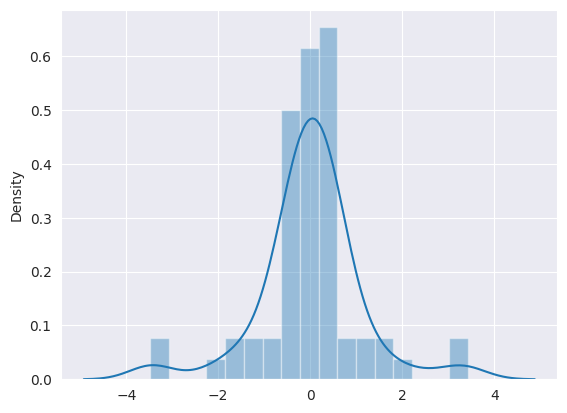

In [ ]:
#histogram for the tensor values
sns.distplot(final_tensor_output)

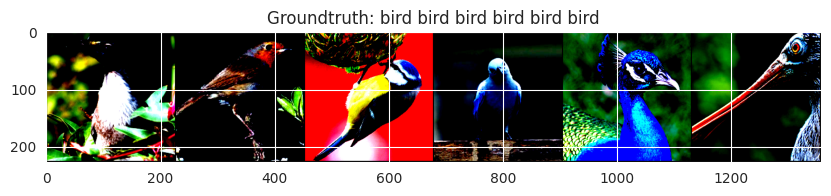

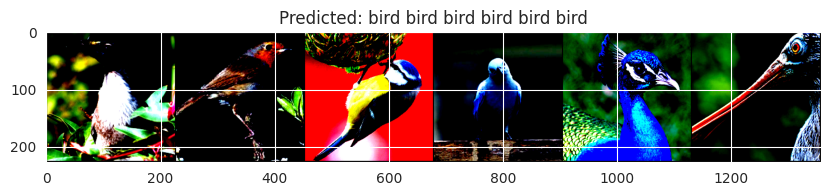

In [ ]:
BIRD_SQUIRREL_CLASSES = ('bird', 'squirrel')

# Function to display images along with their labels
def imshow(img, title):
    npimg = img.numpy()
    plt.figure(figsize=(10, 5))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()



# Function to display ground truth and predictions
def show_groundtruth_and_predictions(model, data_loader, classes):
    # Get a batch of images
    images, labels = next(iter(data_loader))
    images, labels = images[:6], labels[:6]  # Displaying 6 images

    # Show ground truth
    imshow(make_grid(images), title="Groundtruth: " + ' '.join(f'{classes[labels[j]]}' for j in range(len(labels))))

    # Get predictions
    model.eval()  # Set model to evaluation mode
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Show predictions
    imshow(make_grid(images), title="Predicted: " + ' '.join(f'{classes[predicted[j]]}' for j in range(len(predicted))))

# Use the function to display ground truth and predictions
show_groundtruth_and_predictions(Network_arch.to('cpu'), test_loader, BIRD_SQUIRREL_CLASSES)


In [ ]:
# Initialize lists for accurate predictions and total counts per class
accurate_class_pred = [0, 0]  # Two classes: bird and squirrel
Combined_class_accurate = [0, 0]

# Ensure Network_arch is set to evaluation mode and moved to the appropriate device
Network_arch.eval()
Network_arch.to(device)

# No gradients needed
with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        Final_Out = Network_arch(X)
        _, Induvidual_class_prediction = torch.max(Final_Out, 1)
        CIF_out = (Induvidual_class_prediction == y)

        for Induvidual_out in range(len(y)):  # Use len(y) to iterate through all examples
            label = y[Induvidual_out].item()  # Get the actual label as an integer
            accurate_class_pred[label] += CIF_out[Induvidual_out].item()
            Combined_class_accurate[label] += 1

# Print the accuracy of each class
for Induvidual_class_accuracy in range(len(BIRD_SQUIRREL_CLASSES)):  # Iterate through each class
    if Combined_class_accurate[Induvidual_class_accuracy] > 0:  # Prevent division by zero
        print('Accuracy of %5s : %2d %%' % (
            BIRD_SQUIRREL_CLASSES[Induvidual_class_accuracy],
            100 * accurate_class_pred[Induvidual_class_accuracy] / Combined_class_accurate[Induvidual_class_accuracy]
        ))
    else:
        print('Accuracy of %5s : N/A (no samples)' % (BIRD_SQUIRREL_CLASSES[Induvidual_class_accuracy]))


Accuracy of  bird : 67 %
Accuracy of squirrel : 69 %


In [ ]:
def Cross_validate_predicted_data(model, data_loader):
    correct_data = []
    incorrect_data = []
    model.eval()
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probabilities = F.softmax(outputs, dim=1)
            _, predictions = torch.max(outputs, 1)
            matches = predictions.eq(labels)

            for label, probability, match in zip(labels, probabilities, matches):
                if match:
                    correct_data.append((label, probability))
                else:
                    incorrect_data.append((label, probability))

    # Sort based on the confidence (highest probability)
    correct_data.sort(key=lambda x: torch.max(x[1]).item(), reverse=True)
    incorrect_data.sort(key=lambda x: torch.max(x[1]).item(), reverse=True)

    return correct_data, incorrect_data

# Replace Testdata_Loader with the correct data loader variable name if different
correct_data, incorrect_data = Cross_validate_predicted_data(Network_arch, test_loader)

# Example on how to print or use the sorted data
print("Correct Predictions (Sample):", correct_data[:5])  # Prints first 5 samples of correctly classified images
print("Incorrect Predictions (Sample):", incorrect_data[:5])  # Prints first 5 samples of incorrectly classified images


Correct Predictions (Sample): [(tensor(0, device='cuda:0'), tensor([9.9900e-01, 9.9811e-04], device='cuda:0')), (tensor(0, device='cuda:0'), tensor([0.9986, 0.0014], device='cuda:0')), (tensor(0, device='cuda:0'), tensor([0.9970, 0.0030], device='cuda:0')), (tensor(0, device='cuda:0'), tensor([0.9970, 0.0030], device='cuda:0')), (tensor(0, device='cuda:0'), tensor([0.9964, 0.0036], device='cuda:0'))]
Incorrect Predictions (Sample): [(tensor(1, device='cuda:0'), tensor([0.9185, 0.0815], device='cuda:0')), (tensor(1, device='cuda:0'), tensor([0.8202, 0.1798], device='cuda:0')), (tensor(1, device='cuda:0'), tensor([0.8069, 0.1931], device='cuda:0')), (tensor(0, device='cuda:0'), tensor([0.2070, 0.7930], device='cuda:0')), (tensor(1, device='cuda:0'), tensor([0.7872, 0.2128], device='cuda:0'))]


In [ ]:
BIRD_SQUIRREL_CLASSES = ['bird', 'squirrel']

def Correct_Prediction(correct_label_predict, class_names):
    # Ensure the display does not exceed the number of correct predictions available
    display_count = min(5, len(correct_label_predict))

    for sample in range(display_count):
        correct_label, prediction = correct_label_predict[sample]
        _, predicted_label_idx = torch.max(prediction, -1)  # Get the index of the max log-probability
        original_class = class_names[correct_label]  # Convert index to class name
        predicted_class = class_names[predicted_label_idx]


        print(f'Original image class     :  {original_class}')
        print(f'Predicted image class    :  {predicted_class}')

# Assuming Correct_Data contains tuples of (actual class index, prediction tensor)
Correct_Prediction(correct_data, BIRD_SQUIRREL_CLASSES)


Original image class     :  bird
Predicted image class    :  bird
Original image class     :  bird
Predicted image class    :  bird
Original image class     :  bird
Predicted image class    :  bird
Original image class     :  bird
Predicted image class    :  bird
Original image class     :  bird
Predicted image class    :  bird


In [ ]:
#Examples of Incorrect Prediction
def Incorrect_Prediction(Incorrect_label_predict, CIFAR10_Classes):
    for Sample in range(1*5):
        Incorrect_Label, Prediction = Incorrect_label_predict[Sample]
        Incorrect_pred, Incorrectly_predicted_label = torch.max(Prediction, -1)
        Original_class = CIFAR10_Classes[Incorrect_Label]
        Incorrectly_Predicted_class = CIFAR10_Classes[Incorrectly_predicted_label ]
        print(f'Orginal images class     :  {Original_class}')
        print(f'Predicted images class   :  {Incorrectly_Predicted_class}')
Correct_Prediction(correct_data, BIRD_SQUIRREL_CLASSES)

Original image class     :  bird
Predicted image class    :  bird
Original image class     :  bird
Predicted image class    :  bird
Original image class     :  bird
Predicted image class    :  bird
Original image class     :  bird
Predicted image class    :  bird
Original image class     :  bird
Predicted image class    :  bird


### Results and Analysis

Preliminary results from our experiments indicate a promising ability of the CNN model to distinguish between images of birds and squirrels. The accuracy and loss metrics, observed through training and validation phases, suggest effective learning. However, certain instances of misclassification highlight challenges in dealing with images where subjects are partially obscured or presented in unusual poses.

A detailed analysis of the confusion matrix reveals insights into the model's predictive behavior, offering clues to its strengths and weaknesses in recognizing specific features associated with each class. This analysis underscores the importance of a balanced dataset and the potential need for more sophisticated data augmentation techniques.

The results, though preliminary, are encouraging. They lay a solid foundation for further refinement of the model. Notably, the current stage of the project has not yet achieved optimal results, primarily due to limitations in the dataset's diversity and size, as well as the need for further hyperparameter optimization.

Future work will focus on addressing these limitations, with a particular emphasis on enhancing the dataset and exploring more advanced neural network architectures. This ongoing work is crucial for improving the model's performance and ensuring its applicability to real-world conservation efforts.






## 5. Conclusion / Future Work

### Learnings and Reflections
Throughout this project, we encountered several challenges, from dataset imbalance to model overfitting. Each challenge was met with a strategic response, from data augmentation to regularization techniques, teaching us valuable lessons about the intricacies of deep learning in practical applications. Our journey through this project reinforced the importance of a methodical approach to model development, the value of comprehensive evaluation, and the need for continuous learning and adaptation.

### Limitations and Failure Cases
Despite the successes, our model is not without its limitations. Certain images, especially those with complex backgrounds or subjects in unconventional poses, proved challenging for the model to classify accurately. These failure cases highlight the limitations of our current approach and underscore the need for further research into more sophisticated models and techniques.

## Future Work

Looking ahead, given the scope and outcomes of our project, several avenues for future exploration and enhancement present themselves. Each of these opportunities not only promises to extend the boundaries of our current work but also aims to foster greater innovation and application in the field of wildlife image classification. The following points outline our vision for the future directions of this initiative:

### Incorporating Additional Species
- To enhance the model's utility and applicability in diverse ecological studies, future iterations could aim to classify a broader range of species. This expansion would significantly enrich biodiversity monitoring efforts and contribute to more comprehensive conservation strategies.

### Deployment in Camera Trap Technology
- Integrating our model with camera trap technology used in wildlife monitoring could enable real-time, automated species identification in natural habitats. This step towards practical application would mark a significant milestone in the convergence of technology and conservation.

### Adaptive Learning Mechanisms
- Implementing adaptive learning techniques would allow the model to continuously improve and update its classification accuracy based on new data inputs. This approach would be particularly beneficial in dynamic ecological environments where species distributions and behaviors evolve over time.

### Collaboration with Ecological Researchers and Conservationists
- Establishing partnerships with experts in ecology and conservation would provide valuable insights into the practical needs and challenges of wildlife monitoring. Such collaborations could guide the refinement of the model to better serve its intended purpose in real-world contexts.

### Public Dataset Contribution and Crowd-Sourcing
- By contributing our dataset to public repositories and encouraging crowd-sourced data collection, we can vastly increase the diversity and volume of training data. This collective effort would not only improve model performance but also engage a wider community in conservation efforts.

### Enhancement of Computational Efficiency
- Future work will also focus on optimizing the model's computational efficiency, enabling its deployment on devices with limited processing capabilities. This optimization is crucial for applications in remote wildlife monitoring stations.

### Ethical Considerations and Bias Mitigation
- As we progress, it is imperative to address ethical considerations related to automated wildlife monitoring, including privacy concerns and potential biases in data collection. Ensuring that our model contributes positively to conservation efforts without unintended negative impacts will be a priority.

### Integration with Geographic Information Systems (GIS)
- Linking model outputs with GIS platforms could provide spatial insights into wildlife distributions and movements, offering valuable information for habitat protection and conservation planning.

Each of these future directions not only builds upon the foundation laid by our current work but also aligns with the broader goal of leveraging technology for environmental conservation. By pursuing these avenues, we can contribute to a deeper understanding of biodiversity and support the preservation of wildlife through informed, data-driven strategies.